<a href="https://colab.research.google.com/github/MohamedMoustafaNUIG/FastAI_Book/blob/main/01_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai

In [ ]:
!pip install fastai --upgrade

In [16]:
from fastai.vision.all import *

# Image Classification

In [17]:
path = untar_data(URLs.PETS)/'images'

In [3]:
def is_cat(x): return x[0].isupper()

In [4]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
    )

In [5]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [6]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.176471,0.026932,0.008796,00:45


epoch,train_loss,valid_loss,error_rate,time
0,0.048599,0.023592,0.007442,00:47


In [8]:
import ipywidgets as widgets

In [9]:
uploader = widgets.FileUpload()

In [10]:
uploader

FileUpload(value={}, description='Upload')

In [11]:
img = PILImage.create(uploader.data[0])

In [14]:
import matplotlib.pyplot as plt

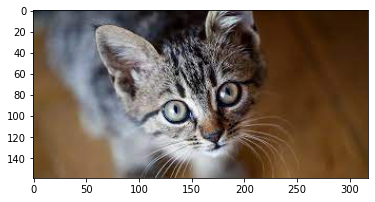

In [15]:
plt.imshow(img)

In [12]:
is_cat,_,probs = learn.predict(img)

In [18]:
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


# Image Segmentation

In [19]:
path = untar_data(URLs.CAMVID_TINY)

In [20]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
    )

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


In [21]:
learn = unet_learner(dls, resnet34)

In [22]:
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.640129,2.465234,00:03


epoch,train_loss,valid_loss,time
0,1.735800,1.405782,00:01
1,1.506804,1.260766,00:01
2,1.396575,1.128358,00:01
3,1.245239,0.956982,00:01
4,1.107486,0.957672,00:01
5,0.995600,0.852925,00:01
6,0.904468,0.855015,00:01
7,0.835800,0.851109,00:01


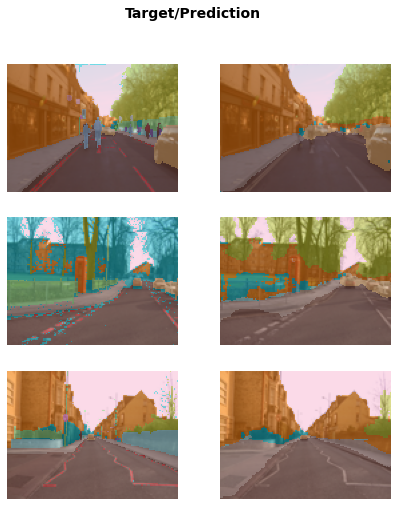

In [24]:
learn.show_results(max_n=3, figsize=(7,8))

# NLP

In [25]:
from fastai.text.all import *

In [26]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')

In [27]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

In [30]:
learn.model = learn.model.cuda()

In [31]:
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.243127,0.215400,0.915400,03:50


epoch,train_loss,valid_loss,accuracy,time
0,0.232046,0.239077,0.902760,07:07
1,0.203853,0.189999,0.925720,07:07
2,0.139997,0.199835,0.927160,07:07
3,0.110795,0.205993,0.927480,07:07


In [32]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([6.5783e-05, 9.9993e-01]))

# Building models using tabular data (i.e. from CSV files and such)

In [33]:
from fastai.tabular.all import *

In [34]:
path = untar_data(URLs.ADULT_SAMPLE)

In [35]:
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
                                  cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
                                  cont_names = ['age', 'fnlwgt', 'education-num'],
                                  procs = [Categorify, FillMissing, Normalize]
                                  )

In [36]:
learn = tabular_learner(dls, metrics=accuracy)

In [37]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.376191,0.370767,0.827396,00:04
1,0.371038,0.362997,0.823556,00:04
2,0.362640,0.351565,0.835534,00:04


# Recommender Systems

In [38]:
from fastai.collab import *

In [39]:
path = untar_data(URLs.ML_SAMPLE)

In [40]:
dls = CollabDataLoaders.from_csv(path/'ratings.csv')

In [41]:
learn = collab_learner(dls, y_range=(0.5,5.5))

In [42]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.494631,1.446088,00:00


epoch,train_loss,valid_loss,time
0,1.378291,1.388785,00:00
1,1.285816,1.213464,00:00
2,1.042476,0.900207,00:00
3,0.808106,0.743675,00:00
4,0.689187,0.701518,00:00
5,0.646311,0.688768,00:00
6,0.621527,0.682618,00:00
7,0.609755,0.678911,00:00
8,0.604080,0.677955,00:00
9,0.600697,0.677751,00:00


In [43]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,16.0,80.0,4.0,4.103167
1,76.0,81.0,5.0,3.541026
2,94.0,97.0,3.5,3.955620
3,45.0,29.0,1.0,3.333183
4,63.0,6.0,4.5,3.050807
5,36.0,42.0,3.5,3.660057
6,41.0,49.0,4.0,3.997902
7,41.0,79.0,4.0,4.023420
8,62.0,21.0,4.0,3.541444
